In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('turnover.csv')
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Company Type,Turn Over
0,0.38,0.53,2,157,3,0,1,0,7,low
1,0.80,0.86,5,262,6,0,1,0,7,high
2,0.11,0.88,7,272,4,0,1,0,7,high
3,0.72,0.87,5,223,5,0,1,0,7,low
4,0.37,0.52,2,159,3,0,1,0,7,low


In [3]:
dataset.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Company Type             False
Turn Over                False
dtype: bool

In [4]:
dataset.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Company Type', 'Turn Over'],
      dtype='object')

In [5]:
dataset.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Company Type
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.012261
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.006810
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.019078
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.007722
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.034825
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.011324
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.009936
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.036954
Company Type,0.012261,0.006810,0.019078,0.007722,-0.034825,0.011324,0.009936,-0.036954,1.000000


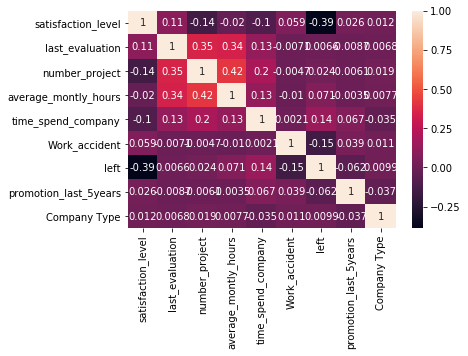

In [6]:
import seaborn as sns
sns.heatmap(dataset.corr(),annot=True)

In [7]:
x=dataset.iloc[:,:9].values
x

array([[0.38, 0.53, 2.  , ..., 1.  , 0.  , 7.  ],
       [0.8 , 0.86, 5.  , ..., 1.  , 0.  , 7.  ],
       [0.11, 0.88, 7.  , ..., 1.  , 0.  , 7.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 1.  , 0.  , 8.  ],
       [0.11, 0.96, 6.  , ..., 1.  , 0.  , 8.  ],
       [0.37, 0.52, 2.  , ..., 1.  , 0.  , 8.  ]])

In [8]:
x.shape

(14999, 9)

In [9]:
y=dataset.iloc[:,-1].values
y

array(['low', 'high', 'high', ..., 'low', 'low', 'low'], dtype=object)

In [10]:
y.shape

(14999,)

In [11]:
from sklearn.preprocessing import LabelEncoder
lb2=LabelEncoder()
y=lb2.fit_transform(y)
y

array([1, 0, 0, ..., 1, 1, 1])

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
classifier=RandomForestClassifier(n_estimators=30,criterion='gini',random_state=0)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=10)

In [15]:
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [16]:
y_predict=classifier.predict(x_test)

In [17]:
y_predict

array([1, 1, 0, ..., 1, 0, 0])

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.6653333333333333

In [19]:
from sklearn.neighbors import KNeighborsClassifier
classifier1=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier1.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
y_predict1=classifier1.predict(x_test)

In [21]:
y_predict1

array([0, 1, 1, ..., 0, 0, 1])

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict1)

0.5671111111111111

In [23]:
from sklearn.tree import DecisionTreeClassifier
classifier2=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier2.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [24]:
y_predict2=classifier2.predict(x_test)

In [25]:
y_predict2

array([1, 0, 0, ..., 0, 1, 1])

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict2)

0.6537777777777778

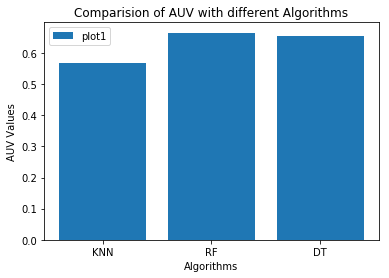

In [27]:
x=["KNN","RF","DT"]
y=[0.567,0.665,0.653]
plt.bar(x,y,label="plot1")
plt.xlabel("Algorithms")
plt.ylabel("AUV Values")
plt.title("Comparision of AUV with different Algorithms")
plt.legend()#used to identify multiple plots in graph which differentiates by colour
plt.show()